# MNIST

### Importing the libraries

In [1]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

from models import get_convolutional_model

In [2]:
# there are 10 classes
num_classes: int = 10
# an image consists of 28x28 pixels
input_shape: tuple = (28, 28, 1)

### Load the data

Loading and splitting the MNIST dataset into train and test dataset.
This is done with keras, since it is a simple function call.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Scale the images to be in a [0, 1] interval

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Expand the dimensions of the training and test dataset so that images have the shape (28, 28, 1)

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

Convert class vectors to binary class matrices

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(f'Train Dataset Shape: {x_train.shape}')
print(f'Training Samples: {x_train.shape[0]}')
print(f'Test Samples: {x_test.shape[0]}')


Train Dataset Shape: (60000, 28, 28, 1)
Training Samples: 60000
Test Samples: 10000


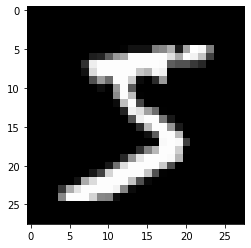

In [8]:
first_image = x_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [9]:
model = get_convolutional_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-07-05 12:59:02.677801: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Train the model

In [10]:
batch_size: int = 128
epochs: int = 20

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 23s 52ms/step - loss: 0.3748 - accuracy: 0.8861 - val_loss: 0.0829 - val_accuracy: 0.9785
Epoch 2/20
422/422 [==============================] - 23s 54ms/step - loss: 0.1106 - accuracy: 0.9659 - val_loss: 0.0548 - val_accuracy: 0.9857
Epoch 3/20
422/422 [==============================] - 23s 53ms/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 4/20
422/422 [==============================] - 27s 65ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 5/20
422/422 [==============================] - 36s 86ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 6/20
422/422 [==============================] - 51s 121ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 7/20
 18/422 [>.............................] - ETA: 41s - loss: 0.0519 - accuracy: 0.9818

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}')